### Decision Tree

## 1. 모듈 불러오기

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from os import system

In [2]:
system('pip install graphviz')

0

In [3]:
import graphviz

In [4]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
x = iris.data
y = iris.target

## 2. 트리 구축

- 기본적인 트리 구축

In [19]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(iris.data,iris.target)

- 엔트로피를 활용한 트리

In [20]:
clf2=tree.DecisionTreeClassifier(criterion="entropy")
clf2.fit(iris.data,iris.target)

DecisionTreeClassifier(criterion='entropy')

- 프루닝

In [21]:
clf3=tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf3.fit(iris.data,iris.target)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

## 3. Traing - Test 구분 및 Confusion Matrix계산

- TRAINING/TEST 구분

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,stratify=iris.target,random_state=1)

- confusion matrix 구하기

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,clf.predict(x))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [22]:
confusion_matrix(iris.target,clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [23]:
confusion_matrix(iris.target,clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

## 4. 시각화

In [24]:
dot_data=tree.export_graphviz(clf,out_file=None,
                             feature_names=iris.feature_names,
                            class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True
                             )
graph=graphviz.Source(dot_data)

In [25]:
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [26]:
dot_data2=tree.export_graphviz(clf2,out_file=None,
                             feature_names=iris.feature_names,
                            class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True
                             )
graph2=graphviz.Source(dot_data2)

In [28]:
dot_data3=tree.export_graphviz(clf3,out_file=None,
                             feature_names=iris.feature_names,
                            class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True
                             )
graph3=graphviz.Source(dot_data3)


## 5. Decision Regression Tree

- 모듈 불러오기 및 데이터 생성

In [30]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
x = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(x).ravel()


- Regression Tree 구축

In [31]:
regr1 = tree.DecisionTreeRegressor(max_depth=2)
regr2=tree.DecisionTreeRegressor(max_depth=5)

In [32]:
regr1.fit(x,y)

DecisionTreeRegressor(max_depth=2)

In [34]:
regr2.fit(x,y)

DecisionTreeRegressor(max_depth=5)

In [35]:
X_test=np.arange(0.0,5.0,0.01)[:,np.newaxis]
X_test

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [36]:
y_1=regr1.predict(X_test)
y_2=regr2.predict(X_test)

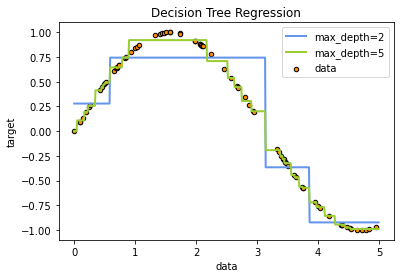

In [38]:
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()